In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pyGTC
%matplotlib inline

In [2]:
# Create Npoints samples from random multivariate, ndim-dimensional Gaussian
def create_random_samples(ndim, Npoints):
    means = np.random.rand(ndim)
    cov = .5 - np.random.rand(ndim**2).reshape((ndim,ndim))
    cov = np.triu(cov)
    cov += cov.T - np.diag(cov.diagonal())
    cov = np.dot(cov,cov)
    samples =  np.random.multivariate_normal(means, cov, Npoints)
    return samples

In [3]:
# Create two sets of sample points with 8 parameters and 50000 points
samples1 = create_random_samples(8, 50000)
samples2 = 1+create_random_samples(8, 50000)

# List of parameter names, supports latex
names = ['param name', '$B_\mathrm{\lambda}$', '$C$', '$\\lambda$', 'C', 'D', 'M', '$\\gamma$']

# Labels for the different chains
#chainLabels = "data1 $\lambda$"
chainLabels = ["data1 $\lambda$", "data 2"]

# List of Gaussian curves to plot (to represent priors): mean, width
# List can be shorter than number of parameters
# Empty () or None if no prior to plot
priors = ((2, 1), (.5, 2), (), (0, .4), None, ())

# List of truth values, to mark best-fit or input values
# NOT a python array because of different lengths
#truths = (4, .5, None, .1, 0, None, None, 0)
truths = ((4, .5, None, .1, 0, None, None, 0), (None, None, .3, 1))

# List of parameter ranges to show, empty () or None to let pyGTC decide
paramRanges = ((-3,5),None,(-2,4),())

# Labels for the different truths
#truthLabels = 'the truth'
truthLabels = ( 'the truth', 'alternative truth')

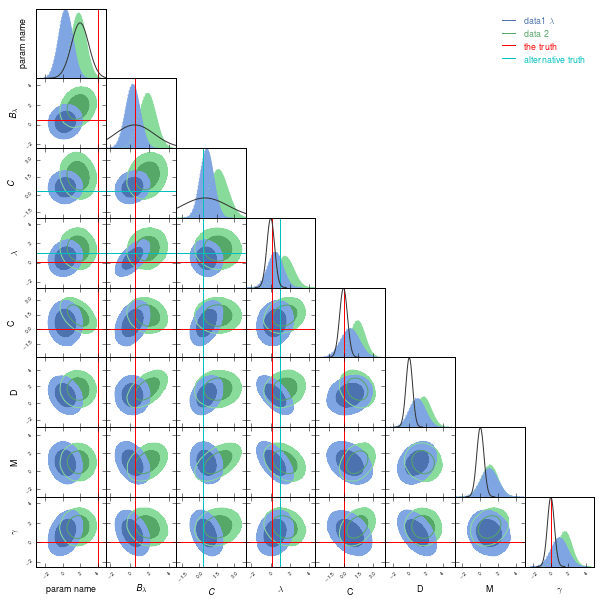

In [4]:
# Do the magic
GTC = pyGTC.plotGTC(chains=[samples1,samples2], paramNames=names, truths=truths, priors=priors, 
                    chainLabels=chainLabels, truthLabels=truthLabels, paramRanges=paramRanges)

# IMPORTANT: First save the publication-ready plot as is, to preserve its size and size-to font ratio
plt.savefig('GTC.pdf',bbox_inches='tight')

# Now increase figure size for visibility on screen
plt.gcf().set_size_inches(10,10)